In [1]:
from xgcm import Grid
import pop_tools
import gcsfs
import fsspec as fs
import numpy as np
import xesmf as xe
import xarray as xr
import random
import matplotlib.pyplot as plt
import warnings
from xgcm import Grid
import importlib
import preprocessing
import gcm_filters
import xrft

warnings.filterwarnings("ignore")

importlib.reload(preprocessing)
from preprocessing import preprocess_data
from gcm_filtering import filter_inputs_dataset
from gcm_filtering import filter_inputs

In [2]:
ds_merged = preprocess_data()
ds_merged

Load Data
Interpolating ocean velocities
Modify units
Load Data
Align in time
Interpolating ocean velocities
Regrid Atmospheric Data
Modify units
Mask nans
Calculate relative wind


<xarray.Dataset>
Dimensions:       (time: 7305, yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00 ... 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean      (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
    dxt           (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dyt           (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolat_t      (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolon_t      (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    ht            (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    kmt           (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    wet           (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    area_t        (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    rh_ref        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [3]:
ds_in = ds_merged
ds_in = ds_in.drop(['area_t', 'dxt', 'dyt', 'geolat_t', 'geolon_t', 'ht', 'kmt', 'wet'])
# ds_in.isel(time=slice(0,50,5), xt_ocean=slice(0,3600), yt_ocean=slice(500,550))
ds_in

<xarray.Dataset>
Dimensions:       (time: 7305, yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00 ... 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean      (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    rh_ref        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [4]:
print("Filtering model")
ds_out_50 = filter_inputs_dataset(ds_in, ['yt_ocean', 'xt_ocean'], filter_scale=50, filter_type='gaussian')
ds_out_50
ds_out_100 = filter_inputs_dataset(ds_in, ['yt_ocean', 'xt_ocean'], filter_scale=100, filter_type='gaussian')
ds_out_100
ds_out_150 = filter_inputs_dataset(ds_in, ['yt_ocean', 'xt_ocean'], filter_scale=150, filter_type='gaussian')
ds_out_150

Filtering model


<xarray.Dataset>
Dimensions:       (time: 7305, xt_ocean: 3600, yt_ocean: 2700)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00 ... 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean      (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    rh_ref        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
Attributes:
    filter_scale:  150
    filter_type:   gaussian

In [5]:
variables = ["slp", "v_ref", "u_ref", "t_ref", "q_ref", "wind", "rh_ref", 
             "surface_temp", "u_ocean", "v_ocean", "u_relative", "v_relative"]

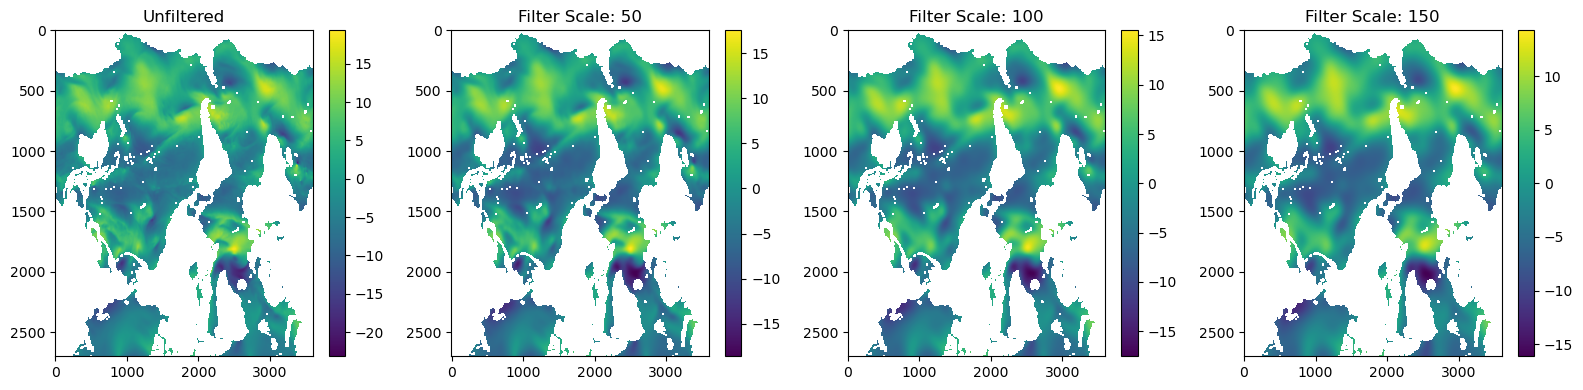

In [6]:
# Create a horizontal layout for four subplots (instead of 3)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))

# Add data to each subplot
im1 = ax1.imshow(ds_in.u_ref[0], aspect='auto')
ax1.set_title("Unfiltered")
fig.colorbar(im1, ax=ax1)

im2 = ax2.imshow(ds_out_50.u_ref[0], aspect='auto')
ax2.set_title("Filter Scale: 50")
fig.colorbar(im2, ax=ax2)

im3 = ax3.imshow(ds_out_100.u_ref[0], aspect='auto')
ax3.set_title("Filter Scale: 100")
fig.colorbar(im3, ax=ax3)

im4 = ax4.imshow(ds_out_150.u_ref[0], aspect='auto')
ax4.set_title("Filter Scale: 150")
fig.colorbar(im4, ax=ax4)

plt.tight_layout()
plt.show()


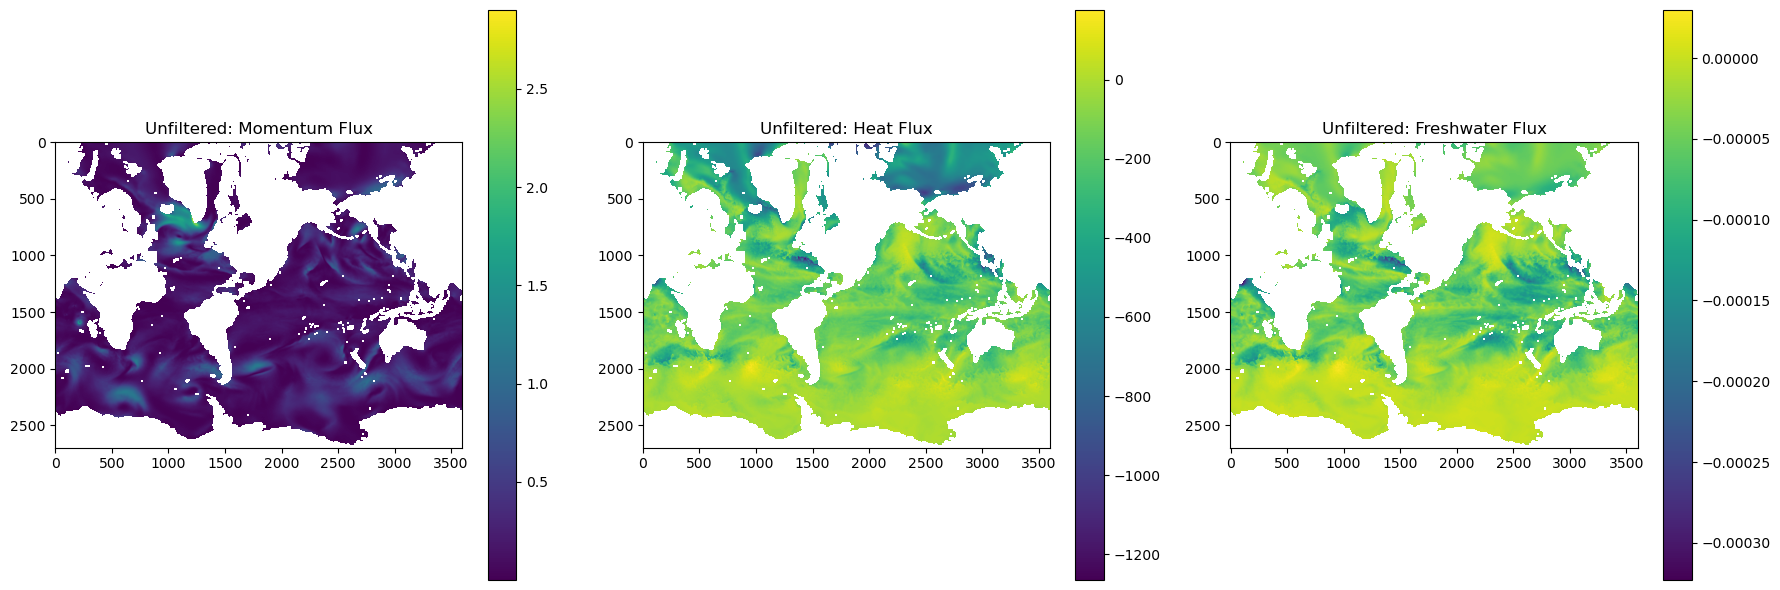

In [7]:
import aerobulk
from aerobulk import noskin

snapshot = ds_in.isel(time=0)

ql, qh, taux, tauy, evap =  noskin(
        snapshot.surface_temp,
        snapshot.t_ref,
        snapshot.q_ref,
        snapshot.u_relative,
        snapshot.v_relative,
        slp=snapshot.slp,
        algo='ecmwf',
        zt=2,
        zu=1,
)

momflux_unfiltered = np.sqrt( taux ** 2 + tauy ** 2 )
heatflux_unfiltered = ql + qh
freshflux_unfiltered = evap

# Create a horizontal layout for three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Add data to each subplot
im1 = ax1.imshow(np.rot90(momflux_unfiltered, 2))
ax1.set_title("Unfiltered: Momentum Flux")
fig.colorbar(im1, ax=ax1) 

im2 = ax2.imshow(np.rot90(heatflux_unfiltered, 2))
ax2.set_title("Unfiltered: Heat Flux")
fig.colorbar(im2, ax=ax2) 

im3 = ax3.imshow(np.rot90(freshflux_unfiltered, 2))
ax3.set_title("Unfiltered: Freshwater Flux")
fig.colorbar(im3, ax=ax3) 

plt.tight_layout()
plt.show()


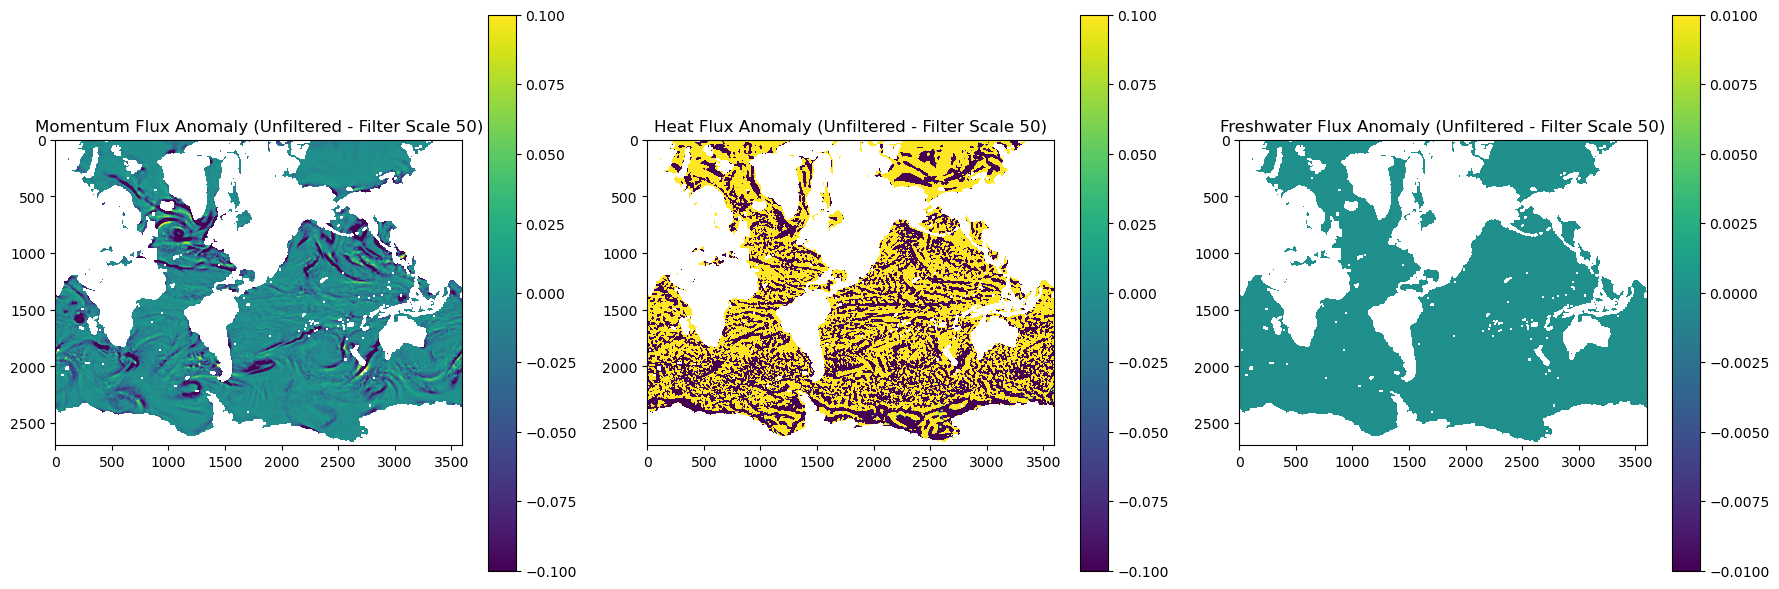

In [18]:
snapshot = ds_out_50.isel(time=0)

ql, qh, taux, tauy, evap =  noskin(
        snapshot.surface_temp,
        snapshot.t_ref,
        snapshot.q_ref,
        snapshot.u_relative,
        snapshot.v_relative,
        slp=snapshot.slp,
        algo='ecmwf',
        zt=2,
        zu=1,
)

momflux = np.sqrt( taux ** 2 + tauy ** 2 )
heatflux = ql + qh
freshflux = evap

# Create a horizontal layout for three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Add data to each subplot
mom_anom = (momflux - momflux_unfiltered).values
im1 = ax1.imshow(np.rot90(mom_anom, 2), vmin=mom_anom.min(), vmax=mom_anom.max())
ax1.set_title("Momentum Flux Anomaly (Unfiltered - Filter Scale 50)")
fig.colorbar(im1, ax=ax1) 

heat_anom = (heatflux - heatflux_unfiltered).values
im2 = ax2.imshow(np.rot90(heat_anom, 2), vmin=heat_anom.min(), vmax=heat_anom.max())
ax2.set_title("Heat Flux Anomaly (Unfiltered - Filter Scale 50)")
fig.colorbar(im2, ax=ax2) 

fresh_anom = (freshflux - freshflux_unfiltered).values
im3 = ax3.imshow(np.rot90(fresh_anom, 2), vmin=fresh_anom.min(), vmax=fresh_anom.max())
ax3.set_title("Freshwater Flux Anomaly (Unfiltered - Filter Scale 50)")
fig.colorbar(im3, ax=ax3) 

plt.tight_layout()
plt.show()


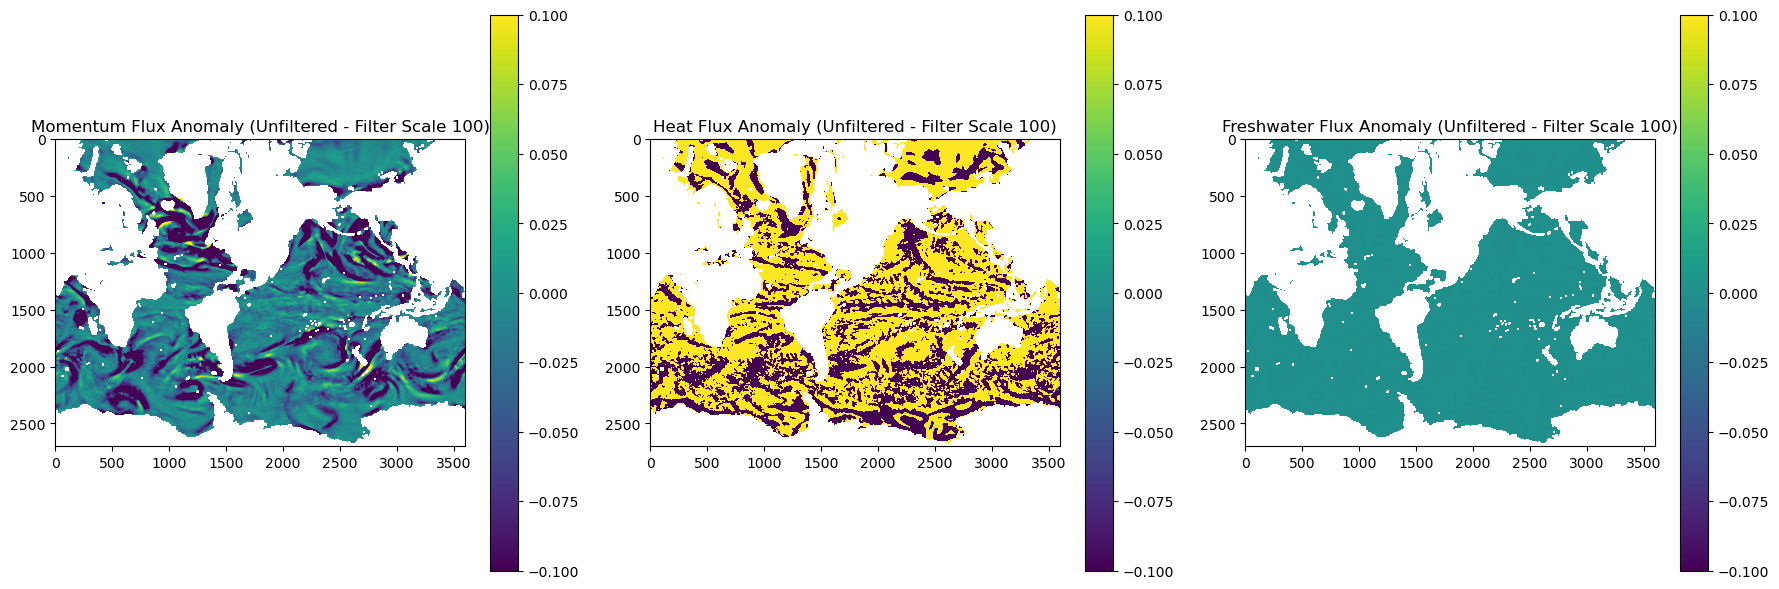

In [28]:
# Assuming the snapshot and noskin function are defined as in your example

snapshot = ds_out_100.isel(time=0)

ql, qh, taux, tauy, evap =  noskin(
        snapshot.surface_temp,
        snapshot.t_ref,
        snapshot.q_ref,
        snapshot.u_relative,
        snapshot.v_relative,
        slp=snapshot.slp,
        algo='ecmwf',
        zt=2,
        zu=1,
)

momflux = np.sqrt( taux ** 2 + tauy ** 2 )
heatflux = ql + qh
freshflux = evap

# Create a horizontal layout for three subplots with a bigger figure size
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Rotate each image 180 degrees counterclockwise and plot
mom_anom = (momflux - momflux_unfiltered).values
im1 = ax1.imshow(np.rot90(mom_anom, 2), vmin=mom_anom.min(), vmax=mom_anom.max())
ax1.set_title("Momentum Flux Anomaly (Unfiltered - Filter Scale 100)")
fig.colorbar(im1, ax=ax1) 

heat_anom = (heatflux - heatflux_unfiltered).values
im2 = ax2.imshow(np.rot90(heat_anom, 2), vmin=heat_anom.min(), vmax=heat_anom.max())
ax2.set_title("Heat Flux Anomaly (Unfiltered - Filter Scale 100)")
fig.colorbar(im2, ax=ax2) 

fresh_anom = (freshflux - freshflux_unfiltered).values
im3 = ax3.imshow(np.rot90(fresh_anom, 2), vmin=fresh_anom.min(), vmax=fresh_anom.max())
ax3.set_title("Freshwater Flux Anomaly (Unfiltered - Filter Scale 100)")
fig.colorbar(im3, ax=ax3) 

# Adjust the layout and display
plt.tight_layout()
plt.show()


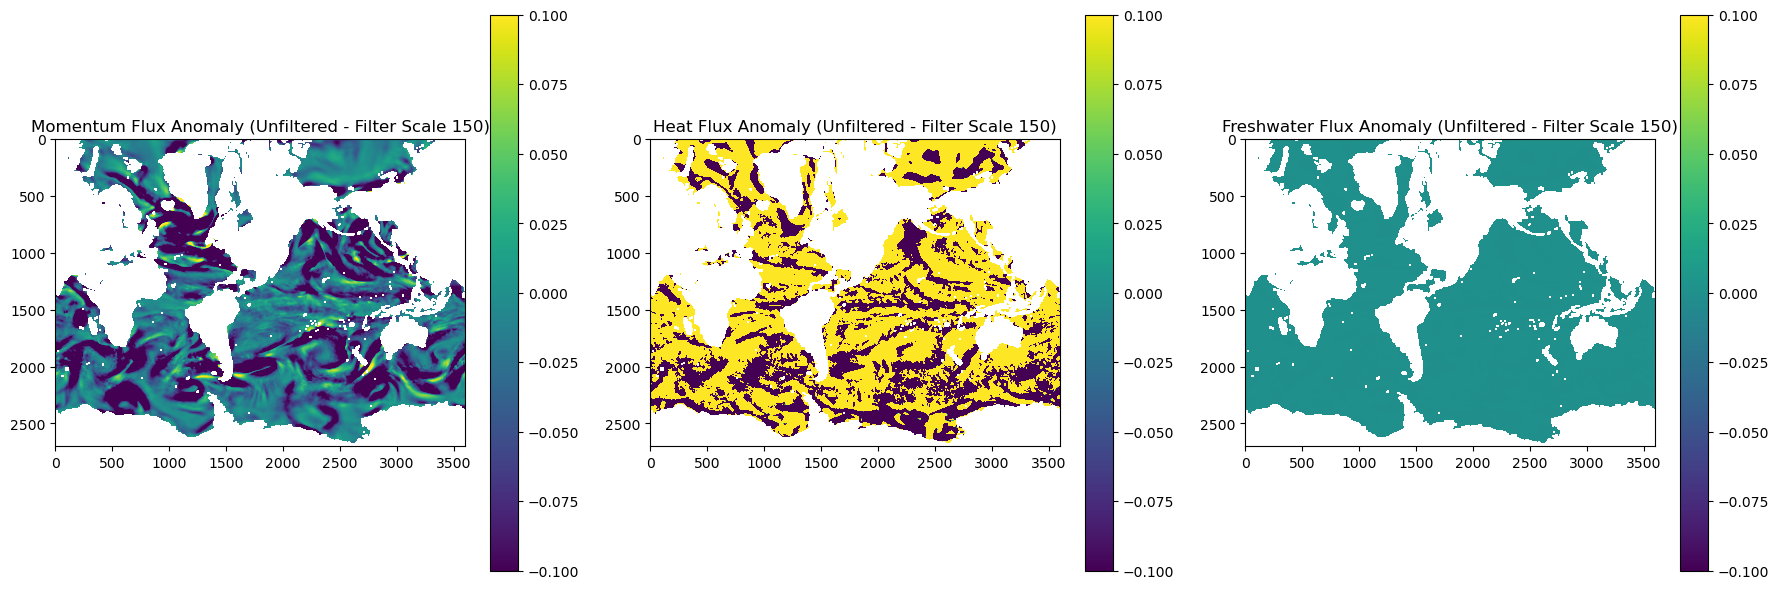

In [29]:
# Assuming the snapshot and noskin function are defined as in your example

snapshot = ds_out_150.isel(time=0)

ql, qh, taux, tauy, evap =  noskin(
        snapshot.surface_temp,
        snapshot.t_ref,
        snapshot.q_ref,
        snapshot.u_relative,
        snapshot.v_relative,
        slp=snapshot.slp,
        algo='ecmwf',
        zt=2,
        zu=1,
)

momflux = np.sqrt( taux ** 2 + tauy ** 2 )
heatflux = ql + qh
freshflux = evap

# Create a horizontal layout for three subplots with a bigger figure size
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Rotate each image 180 degrees counterclockwise and plot
mom_anom = (momflux - momflux_unfiltered).values
im1 = ax1.imshow(np.rot90(mom_anom, 2), vmin=mom_anom.min(), vmax=mom_anom.max())
ax1.set_title("Momentum Flux Anomaly (Unfiltered - Filter Scale 150)")
fig.colorbar(im1, ax=ax1) 

heat_anom = (heatflux - heatflux_unfiltered).values
im2 = ax2.imshow(np.rot90(heat_anom, 2), vmin=heat_anom.min(), vmax=heat_anom.max())
ax2.set_title("Heat Flux Anomaly (Unfiltered - Filter Scale 150)")
fig.colorbar(im2, ax=ax2) 

fresh_anom = (freshflux - freshflux_unfiltered).values
im3 = ax3.imshow(np.rot90(fresh_anom, 2), vmin=fresh_anom.min(), vmax=fresh_anom.max())
ax3.set_title("Freshwater Flux Anomaly (Unfiltered - Filter Scale 150)")
fig.colorbar(im3, ax=ax3) 

# Adjust the layout and display
plt.tight_layout()
plt.show()
